# Regression Trees and Model Optimization - Lab

## Introduction

In this lab, we'll see how to apply regression analysis using CART trees while making use of some hyperparameter tuning to improve our model. 

## Objectives

In this lab you will: 

- Perform the full process of cleaning data, tuning hyperparameters, creating visualizations, and evaluating decision tree models 
- Determine the optimal hyperparameters for a decision tree model and evaluate the performance of decision tree models

## Ames Housing dataset 

The dataset is available in the file `'ames.csv'`. 

- Import the dataset and examine its dimensions: 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load the Ames housing dataset 
data = pd.read_csv('ames.csv')

# Print the dimensions of data
print(data.shape)

# Check out the info for the dataframe
print(data.info())

# Show the first 5 rows
print(data.head())


(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

## Identify features and target data 

In this lab, we will use using 3 predictive continuous features:

#### Features

- `LotArea`: Lot size in square feet
- `1stFlrSF`: Size of first floor in square feet
- `GrLivArea`: Above grade (ground) living area square feet

#### Target

- `SalePrice`', the sale price of the home, in dollars

- Create DataFrames for the features and the target variable as shown above 
- Inspect the contents of both the features and the target variable

In [2]:
# Features and target data
features = data[['LotArea', '1stFlrSF', 'GrLivArea']]
target = data['SalePrice']

# Inspect the contents of both the features and the target variable
print(features.head())
print(target.head())

   LotArea  1stFlrSF  GrLivArea
0     8450       856       1710
1     9600      1262       1262
2    11250       920       1786
3     9550       961       1717
4    14260      1145       2198
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


## Inspect correlations 

- Use scatter plots to show the correlation between the chosen features and the target variable
- Comment on each scatter plot 

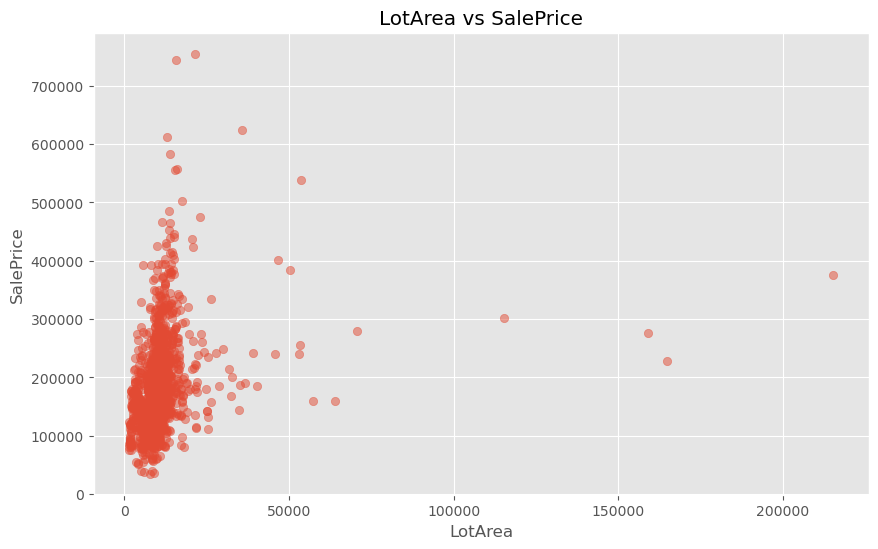

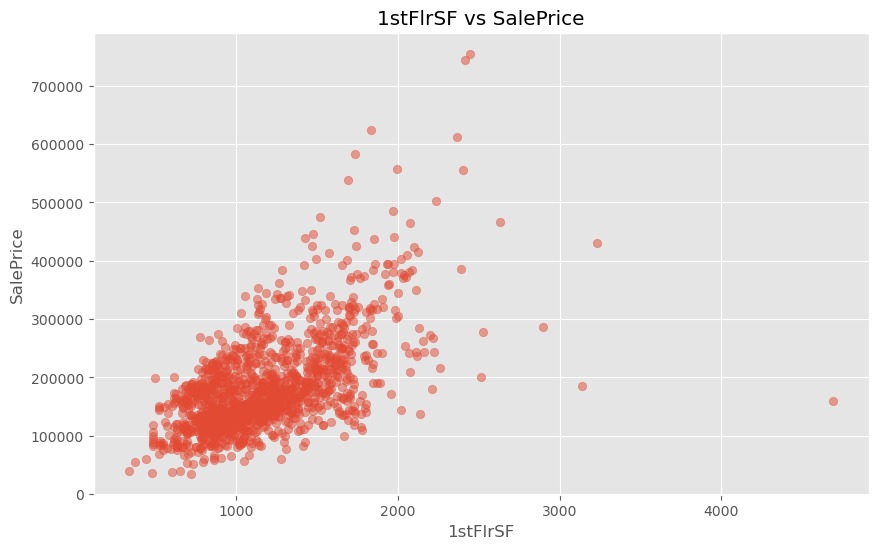

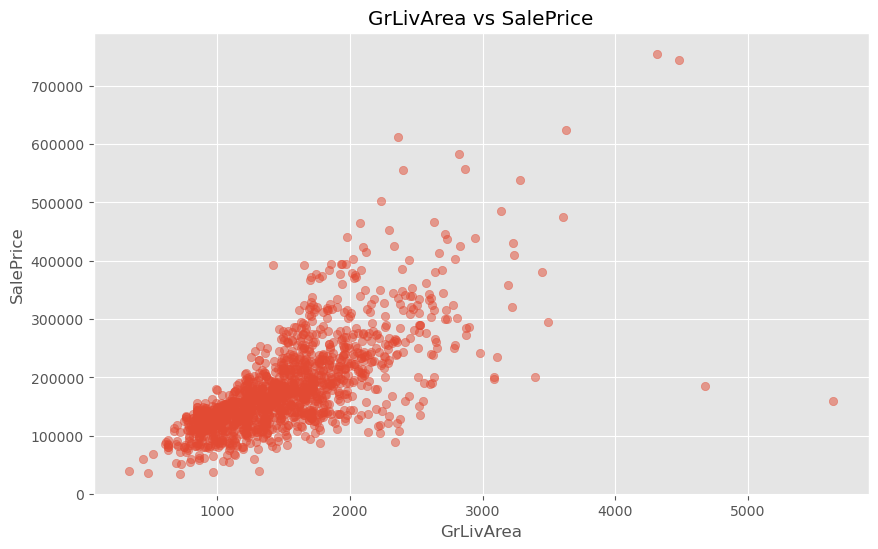

In [3]:
# Scatter plot for LotArea vs SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(features['LotArea'], target, alpha=0.5)
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot for 1stFlrSF vs SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(features['1stFlrSF'], target, alpha=0.5)
plt.title('1stFlrSF vs SalePrice')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot for GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(features['GrLivArea'], target, alpha=0.5)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

## Create evaluation metrics

- Import `r2_score` and `mean_squared_error` from `sklearn.metrics` 
- Create a function `performance(true, predicted)` to calculate and return both the R-squared score and Root Mean Squared Error (RMSE) for two equal-sized arrays for the given true and predicted values 
    - Depending on your version of sklearn, in order to get the RMSE score you will need to either set `squared=False` or you will need to take the square root of the output of the `mean_squared_error` function - check out [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) or this helpful and related [StackOverflow post](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python)
    - The benefit of calculating RMSE instead of the Mean Squared Error (MSE) is that RMSE is in the same units at the target - here, this means that RMSE will be in dollars, calculating how far off in dollars our predictions are away from the actual prices for homes, on average

In [4]:
from sklearn.metrics import r2_score, mean_squared_error

# Import metrics

# Define the function
def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    """
    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)
    
    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    # Return the score
    return [r2, rmse]

# Test the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.6870225614927066]


[0.9228556485355649, 0.6870225614927066]

## Split the data into training and test sets

- Split `features` and `target` datasets into training/test data (80/20) 
- For reproducibility, use `random_state=42`

In [5]:
from sklearn.model_selection import train_test_split 

# Split the data into training and test subsets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Grow a vanilla regression tree

- Import the `DecisionTreeRegressor` class
- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above 
- Use `random_state=45` for tree instance
- Record your observations

In [6]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
# Set random_state=45
regressor = DecisionTreeRegressor(random_state=45)

# Fit the model to training data
regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(x_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)
score

# [0.5961521990414137, 55656.48543887347] - R2, RMSE


[0.5961521990414137, 55656.48543887347]

## Hyperparameter tuning (I)

- Find the best tree depth using depth range: 1-30
- Run the regressor repeatedly in a `for` loop for each depth value  
- Use `random_state=45` for reproducibility
- Calculate RMSE and r-squared for each run 
- Plot both performance measures for all runs 
- Comment on the output 

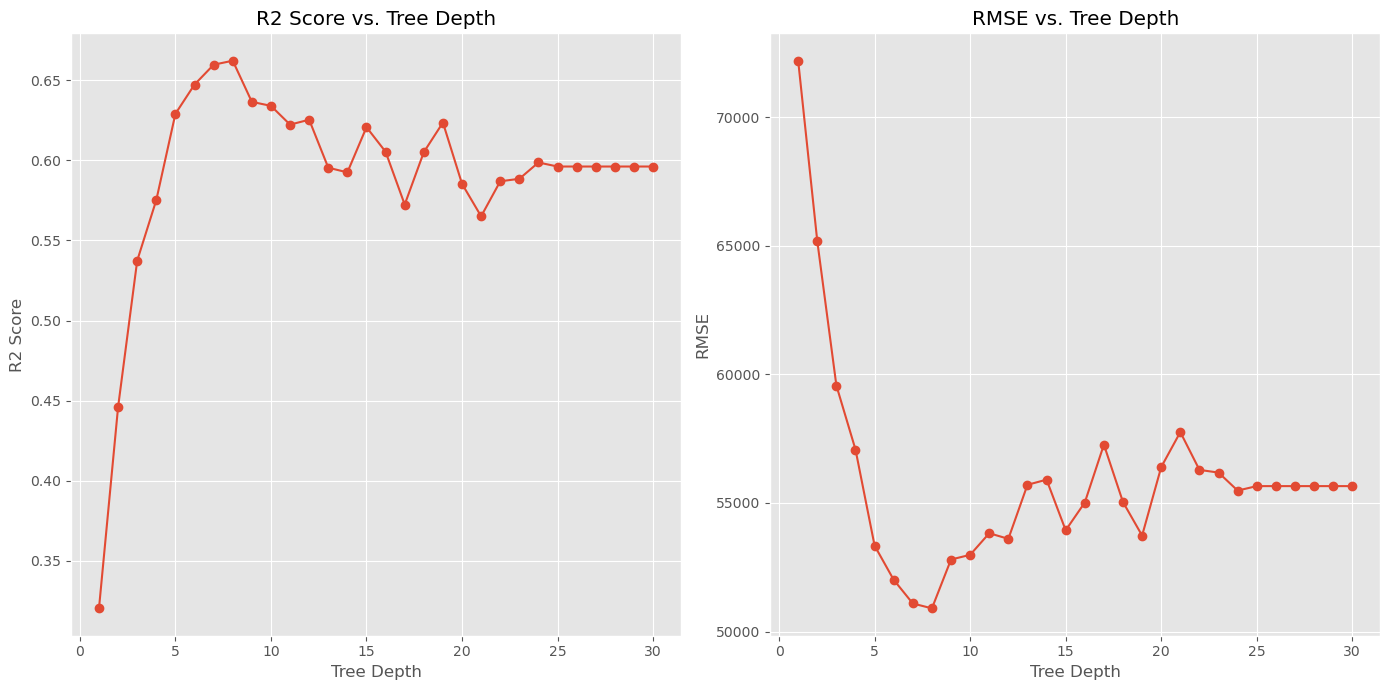

In [7]:
# Your code here 
# Initialize lists to store the performance metrics
r2_scores = []
rmse_scores = []

# Loop over a range of depths from 1 to 30
for depth in range(1, 31):
    # Instantiate the regressor with the current depth
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=45)
    
    # Fit the model to the training data
    regressor.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = regressor.predict(x_test)
    
    # Calculate performance metrics
    score = performance(y_test, y_pred)
    
    # Append the scores to the lists
    r2_scores.append(score[0])
    rmse_scores.append(score[1])

# Plot the performance metrics
plt.figure(figsize=(14, 7))

# Plot R2 scores
plt.subplot(1, 2, 1)
plt.plot(range(1, 31), r2_scores, marker='o')
plt.title('R2 Score vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('R2 Score')

# Plot RMSE scores
plt.subplot(1, 2, 2)
plt.plot(range(1, 31), rmse_scores, marker='o')
plt.title('RMSE vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

## Hyperparameter tuning (II)

- Repeat the above process for `min_samples_split` 
- Use a range of values from 2-10 for this hyperparameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above 

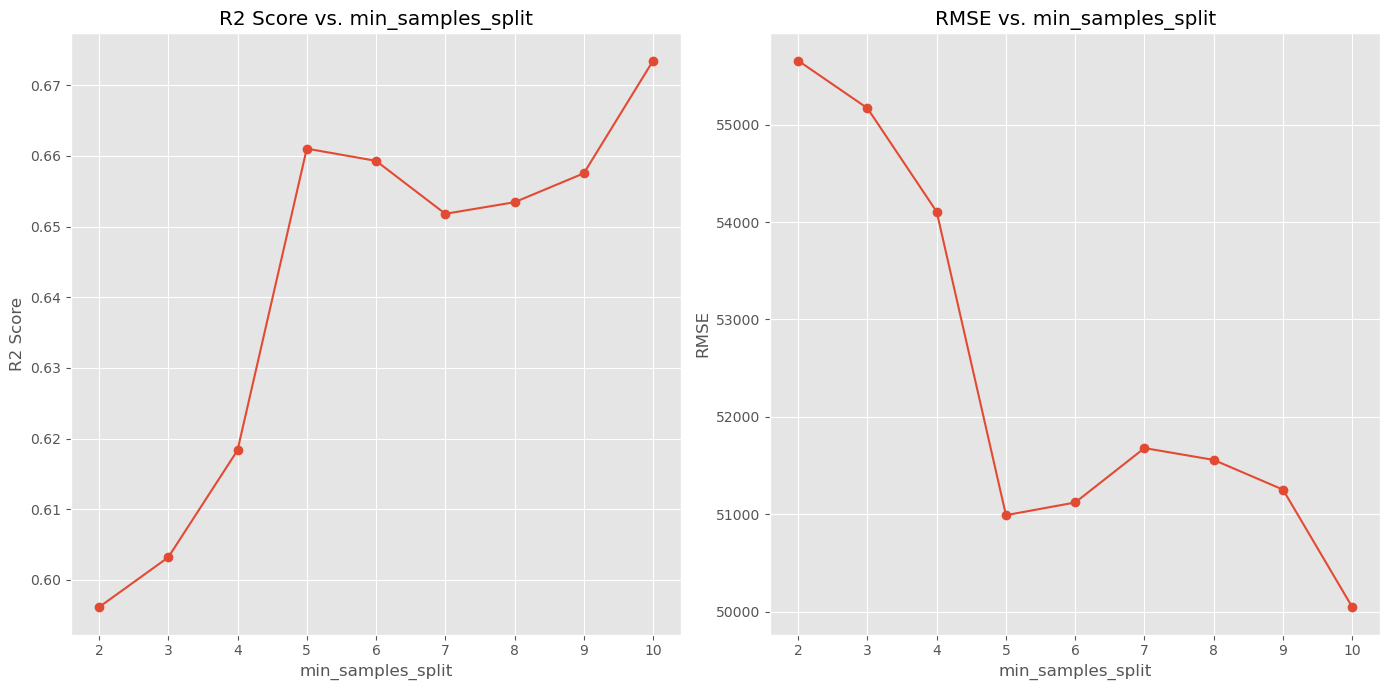

In [8]:
# Initialize lists to store the performance metrics
r2_scores_split = []
rmse_scores_split = []

# Loop over a range of min_samples_split values from 2 to 10
for min_samples_split in range(2, 11):
    # Instantiate the regressor with the current min_samples_split
    regressor = DecisionTreeRegressor(min_samples_split=min_samples_split, random_state=45)
    
    # Fit the model to the training data
    regressor.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = regressor.predict(x_test)
    
    # Calculate performance metrics
    score = performance(y_test, y_pred)
    
    # Append the scores to the lists
    r2_scores_split.append(score[0])
    rmse_scores_split.append(score[1])

# Plot the performance metrics
plt.figure(figsize=(14, 7))

# Plot R2 scores
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), r2_scores_split, marker='o')
plt.title('R2 Score vs. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('R2 Score')

# Plot RMSE scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), rmse_scores_split, marker='o')
plt.title('RMSE vs. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

# Run the *optimized* model 

- Use the best values for `max_depth` and `min_samples_split` found in previous runs and run an optimized model with these values 
- Calculate the performance and comment on the output 

In [9]:
# Instantiate the regressor with the best hyperparameters
optimized_regressor = DecisionTreeRegressor(max_depth=4, min_samples_split=10, random_state=45)

# Fit the model to the training data
optimized_regressor.fit(x_train, y_train)

# Make predictions on the test data
optimized_y_pred = optimized_regressor.predict(x_test)

# Calculate performance using the performance() function 
optimized_score = performance(y_test, optimized_y_pred)
optimized_score

# Output the performance scores
print(f"R2 Score: {optimized_score[0]}")
print(f"RMSE: {optimized_score[1]}")

R2 Score: 0.5752501360810747
RMSE: 57078.63008794533


## Level up (Optional)

- How about bringing in some more features from the original dataset which may be good predictors?
- Also, try tuning more hyperparameters like `max_features` to find a more optimal version of the model 

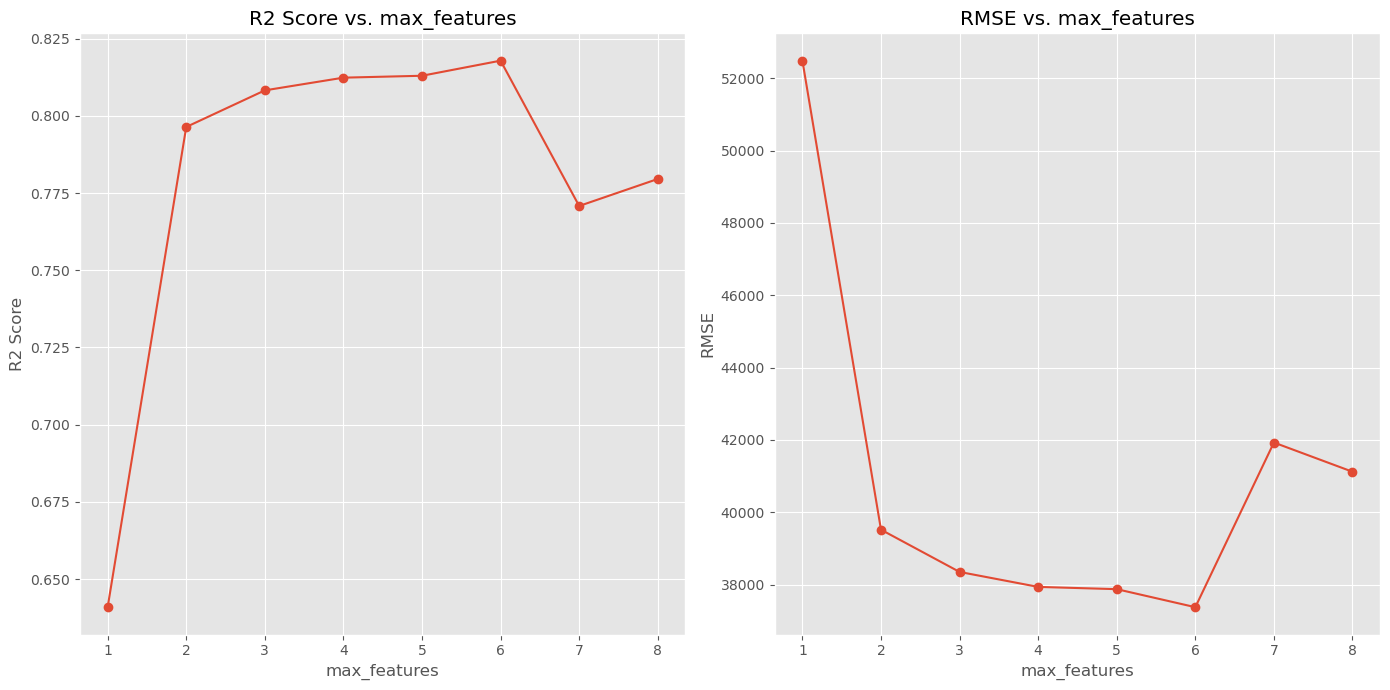

In [10]:
# Your code here 
# Select additional features from the original dataset
additional_features = data[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GarageCars', 'FullBath']]

# Combine the original features with the additional features
all_features = pd.concat([features, additional_features], axis=1)

# Split the data into training and test subsets with the new features
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(all_features, target, test_size=0.2, random_state=42)

# Initialize lists to store the performance metrics for max_features tuning
r2_scores_max_features = []
rmse_scores_max_features = []

# Loop over a range of max_features values from 1 to the number of features
for max_features in range(1, all_features.shape[1] + 1):
    # Instantiate the regressor with the current max_features
    regressor = DecisionTreeRegressor(max_features=max_features, random_state=45)
    
    # Fit the model to the training data
    regressor.fit(x_train_new, y_train_new)
    
    # Make predictions on the test data
    y_pred_new = regressor.predict(x_test_new)
    
    # Calculate performance metrics
    score = performance(y_test_new, y_pred_new)
    
    # Append the scores to the lists
    r2_scores_max_features.append(score[0])
    rmse_scores_max_features.append(score[1])

# Plot the performance metrics
plt.figure(figsize=(14, 7))

# Plot R2 scores
plt.subplot(1, 2, 1)
plt.plot(range(1, all_features.shape[1] + 1), r2_scores_max_features, marker='o')
plt.title('R2 Score vs. max_features')
plt.xlabel('max_features')
plt.ylabel('R2 Score')

# Plot RMSE scores
plt.subplot(1, 2, 2)
plt.plot(range(1, all_features.shape[1] + 1), rmse_scores_max_features, marker='o')
plt.title('RMSE vs. max_features')
plt.xlabel('max_features')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

## Summary 

In this lab, we looked at applying a decision-tree-based regression analysis on the Ames Housing dataset. We saw how to train various models to find the optimal values for hyperparameters. 